
## 🧠 What is a Small Language Model (SLM)?

A **Small Language Model (SLM)** is a neural network-based model designed to understand and generate human language — just like large language models (LLMs), but with **fewer parameters**, typically in the range of **10 million to 1 billion**.

Think of it like:

* 📱 **Smart assistant on your device**
* 🧩 A compact brain trained to handle niche or focused tasks efficiently

---

## 📉 SLM vs LLM: A Visual Analogy

| Characteristic | Small Language Model (SLM) 🪶 | Large Language Model (LLM) 🏋️ |
| -------------- | ----------------------------- | ------------------------------ |
| Parameter Size | 10M - 1B                      | 10B - 500B+                    |
| Speed          | ⚡ Fast inference              | 🐢 Slower without GPU          |
| Resource Needs | 💾 Edge-device friendly       | ☁️ Needs cloud/GPU             |
| Customization  | 🎯 Fine-tuned for tasks       | 🧠 More general knowledge      |
| Privacy        | 🔐 Local, more private        | 🌐 Often cloud-based           |

---

## 📸 Image Suggestions (for slide/post use)

1. **"Brain size" visual**

   > Show a tiny brain (SLM) vs a huge brain (LLM) with text:
   > *“Small is smart when you don’t need it all.”*

2. **“Edge vs Cloud”**

   > Phone with chip → 🔁 Inference happens locally (SLM)
   > Server rack → LLM inference

3. **Latency bar chart**

   > SLM: 50ms 🟩
   > LLM: 2000ms 🟥

4. **Use-case matching**

   > 💬 Chatbot for smart appliances → ✅ SLM
   > 🧪 Research assistant → ✅ LLM

---

## 💡 Advantages of SLMs over LLMs

✅ **Faster inference** – great for real-time or latency-sensitive applications
✅ **Lower compute cost** – no need for GPUs or expensive cloud instances
✅ **Energy-efficient** – better for environment and mobile/edge deployment
✅ **Easier to deploy** – works well on devices like Raspberry Pi, phones
✅ **More private** – can keep data on-device, improving security
✅ **Fine-tuning is cheaper** – domain-specific SLMs can outperform general LLMs

---

## 🛠 Example Use Cases

* 🤖 Embedded AI in smart devices
* 🧾 Quick document classification in edge environments
* 📱 Chatbots on low-power mobile apps
* 🏥 Medical record summarizers trained on specific datasets




# 🚀 SLM Training & Inference Pipeline

Below is the step-by-step breakdown of the Small Language Model (SLM) workflow:

---

### ✅ Part 1: *Our Dataset*
- Load the dataset
- Understand the data schema
- Perform exploratory data analysis (EDA)

---

### ✂️ Part 2: *Data Pre-processing*
- **Tokenization**
- Creating **input-output pairs** for training

---

### 🧠 Part 3: *Assembling the Model Architecture*
- Define model layers (e.g., embedding, transformer blocks)
- Configure positional encodings
- Final output projection head

---

### 🛠 Part 4: *Setting up the SLM Training Pipeline*
- Loss function setup (e.g., CrossEntropyLoss)
- Optimizer (AdamW, learning rate scheduler)
- Training loop and evaluation logic

---

### 📚 Part 5: *Pre-training the SLM*
- Train the model on the pre-processed dataset
- Monitor loss, accuracy, and other metrics
- Save checkpoints

---

### 🔍 Part 6: *Running Inference*
- Load the trained SLM model
- Perform generation or prediction on new inputs
- Evaluate performance on unseen examples

---

_This notebook builds a Small Language Model from scratch, step by step._


# 📘 About the Dataset: TinyStories

The **TinyStories** dataset is a collection of short, simple, and grammatically correct fictional stories generated using Large Language Models (LLMs), designed to resemble the kind of content suitable for children.

### 📊 Key Characteristics:
- **Format**: Each entry is a short story (typically 2-5 sentences)
- **Language**: Clean, simple, and child-friendly English
- **Size**: Available in different scales (TinyStories-1M, TinyStories-10M, etc.)
- **Structure**: Plain text format — ideal for tokenization and next-word prediction tasks

### 🎯 Why TinyStories for SLM?
- Small, clean, and well-formed text — perfect for training **Small Language Models** without needing massive compute resources
- Allows fast experimentation and rapid iteration
- Helps demonstrate the **core concepts** of language modeling (tokenization, autoregressive training, etc.) in a manageable setup




In [1]:
!pip install -U datasets fsspec==2023.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2023.9.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [2]:
from datasets import load_dataset

ds = load_dataset("roneneldan/TinyStories")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

(…)-00000-of-00004-2d5a1467fff1081b.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

(…)-00001-of-00004-5852b56a2bd28fd9.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

(…)-00002-of-00004-a26307300439e943.parquet:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)-00003-of-00004-d243063613e5a057.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

(…)-00000-of-00001-869c898b519ad725.parquet:   0%|          | 0.00/9.99M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2119719 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21990 [00:00<?, ? examples/s]

# Tokenization

Tokenization strategies is **foundational for working with LLMs**. Let's break down the **three major tokenization methods** with real-world examples, their **pros and cons**, and the **go-to choice for LLMs**.

---

## 🔤 1. Character-Level Tokenization

### 📌 How it works:

* Every **character** (including spaces, punctuation) is treated as a token.

### 🔧 Example:

Text: `"Transformers rock!"`
Tokens: `["T", "r", "a", "n", "s", "f", "o", "r", "m", "e", "r", "s", " ", "r", "o", "c", "k", "!"]`

### ✅ Pros:

* Vocabulary is very small (only characters needed)
* No out-of-vocabulary (OOV) words
* Works well with new or unseen words (e.g., typos, rare names)

### ❌ Cons:

* Sequences are long → harder for model to learn long dependencies
* Less semantic information per token
* Slower training/inference

---

## 🧱 2. Word-Level Tokenization

### 📌 How it works:

* Splits text into **full words** using whitespace and punctuation.

### 🔧 Example:

Text: `"Transformers rock!"`
Tokens: `["Transformers", "rock", "!"]`

### ✅ Pros:

* More semantic meaning per token
* Shorter sequences compared to character-level

### ❌ Cons:

* Large vocabulary size → higher memory and storage
* Out-of-vocabulary (OOV) issues: `"transformers"` is fine, but `"Transformrzz"` breaks
* Poor handling of morphology (e.g., "walk" vs "walking")

---

## 🔣 3. Subword-Level Tokenization *(⚡Most common in LLMs)*

### 📌 How it works:

* Words are broken into **subword units** (prefixes, suffixes, roots), e.g. using:

  * **Byte Pair Encoding (BPE)** (used in GPT-2)
  * **WordPiece** (used in BERT)
  * **Unigram LM** (used in SentencePiece / T5)

### 🔧 Example (BPE):

Text: `"Transformers rock!"`
Tokens: `["Trans", "former", "s", "rock", "!"]`
Text: `"Transformrzz"` → `["Trans", "form", "r", "zz"]` ✅ Still works!

### ✅ Pros:

* **Balance between vocab size and sequence length**
* **No OOV issues** — can break any new word into known subword pieces
* Efficient training and generalization
* Captures morphology and rare words well

### ❌ Cons:

* Slight complexity in implementation
* Less interpretable than full words

---

## 🏆 Which One is Used in LLMs?

| Model               | Tokenization Method           |
| ------------------- | ----------------------------- |
| GPT-2, GPT-3, GPT-4 | **BPE (Byte Pair Encoding)**  |
| BERT                | WordPiece                     |
| T5, ALBERT          | Unigram LM (SentencePiece)    |
| LLaMA               | SentencePiece with BPE        |
| PaLM                | SentencePiece with Unigram LM |

✅ So **Subword-level tokenization** is the **de facto standard** in modern LLMs because:

* It reduces model input size (faster, cheaper)
* It generalizes well to unseen inputs
* It's a great trade-off between **granularity** and **efficiency**

---

## 🧠 Visual Summary

| Tokenization | Example Output                      | Pros                           | Cons                                |
| ------------ | ----------------------------------- | ------------------------------ | ----------------------------------- |
| Character    | "T", "r", "a", "n", ...             | Small vocab, robust            | Long sequences, slow, low semantics |
| Word         | "Transformers", "rock", "!"         | Semantic-rich tokens           | OOV issues, large vocab             |
| Subword      | "Trans", "form", "ers", "rock", "!" | Efficient, generalizes, no OOV | Less intuitive tokens               |

---

Let me know if you want a **Colab-ready code demo** comparing the three on a sample text using `tokenizers` or `Hugging Face` library!


Absolutely, Muskaan! Let's dive into **Byte Pair Encoding (BPE)** — one of the most popular subword tokenization algorithms used in modern LLMs like GPT-2 and LLaMA.

---

## 🔤 What is Byte Pair Encoding (BPE)?

**Byte Pair Encoding (BPE)** is a **data-driven tokenization algorithm** that:

* Starts with individual characters
* Iteratively merges the **most frequent pairs of tokens**
* Builds a vocabulary of **subword units** based on frequency

It strikes a balance between character-level and word-level tokenization.

---

## 🔧 BPE Tokenizer: Step-by-Step Example

Let’s take a toy dataset with three sample words:

```
training
trainer
trained
```

We want to tokenize these using BPE.

### 🔹 Step 1: Initialize with character-level tokens

Split each word into characters plus an end-of-word marker (`_`):

```
t r a i n i n g _
t r a i n e r _
t r a i n e d _
```

Initial vocabulary: All characters (`t`, `r`, `a`, `i`, `n`, `e`, `g`, `d`, `_`)

---

### 🔹 Step 2: Count frequent **pairs** of tokens

Let’s count adjacent pairs:

| Pair  | Frequency |
| ----- | --------- |
| `t r` | 3         |
| `r a` | 3         |
| `a i` | 3         |
| `i n` | 3         |
| `n i` | 1         |
| `n e` | 2         |
| `e r` | 1         |
| `e d` | 1         |

🔁 **Most frequent pair**: `i n` → Merge it

---

### 🔹 Step 3: Merge `i n` → new token: `in`

New sequences:

```
t r a in i n g _
t r a in e r _
t r a in e d _
```

Repeat the process of finding frequent pairs and merging:

* Merge `a in` → `ain`
* Merge `r a` → `ra`
* Merge `ra in` → `rain`
* Merge `train` → `train`

Eventually:

```
train ing _
train er _
train ed _
```

Now `train` is a subword in the vocabulary!

---

## ✅ Final Vocabulary (Example)

After enough merges, we might have:

```
train, ing, ed, er, _
```

So `"trained"` is tokenized as: `["train", "ed"]`
And `"trainer"` becomes: `["train", "er"]`

---

## 🎯 Advantages of BPE

| ✅ Pros                          | ❌ Cons                               |
| ------------------------------- | ------------------------------------ |
| Efficient for frequent subwords | Can't handle semantic units directly |
| No OOV (Out-of-Vocab) tokens    | Merge rules are fixed after training |
| Compact vocab vs word-level     | Less interpretable than words        |

---

## 🧠 Used In:

* **GPT-2**
* **LLaMA**
* **OpenNMT**
* HuggingFace's `GPT2TokenizerFast` uses BPE under the hood.




---

## 📘 Example Sentence from TinyStories:

> **"The dragon loved flying."**

We'll run this through a BPE tokenizer and illustrate:

1. Tokenization into subwords
2. Mapping to token IDs



## 🧠 Explanation of Tokens:

| Token       | Meaning                          | Notes                          |
| ----------- | -------------------------------- | ------------------------------ |
| `'The'`     | Start of sentence                | Whole word is in vocab         |
| `'Ġdragon'` | Word "dragon" with leading space | `Ġ` = space in GPT2’s vocab    |
| `'Ġloved'`  | Word "loved" with leading space  | BPE learned it as a whole unit |
| `'Ġflying'` | Word "flying" with space         | Again, a full subword match    |
| `'.'`       | Punctuation                      | Tokenized separately           |

---

## 🔢 Explanation of Token IDs:

Each token has a corresponding integer ID from the GPT-2 vocabulary:

| Token     | ID    |
| --------- | ----- |
| 'The'     | 464   |
| 'Ġdragon' | 20503 |
| 'Ġloved'  | 12190 |
| 'Ġflying' | 24668 |
| '.'       | 13    |

---

## ✅ Summary

* BPE merges frequently co-occurring subwords like `'fly'` + `'ing'` into `'flying'`
* Leading space (`Ġ`) is a trick used by GPT-2 to denote token boundaries
* BPE **ensures compact vocabulary**, **handles rare words**, and avoids **OOV tokens**



In [3]:
!pip install tiktoken

In [4]:
import tiktoken
import os
import numpy as np
from tqdm.auto import tqdm

enc = tiktoken.get_encoding("gpt2")

### 🔧 **What the Code Does**

* Defines a function `process()` that:

  * Tokenizes text using a BPE tokenizer (`enc.encode_ordinary`)
  * Returns a dictionary with `'ids'` (token IDs) and `'len'` (length of IDs)

* Checks if `train.bin` file exists. If not:

  * Applies `process()` to each example in the dataset (`ds.map(...)`) in parallel using 8 processes
  * Removes original `'text'` column and replaces it with token IDs

* For each dataset split (e.g., `train`, `val`):

  * Computes total number of tokens using `np.sum()`
  * Creates a memory-mapped file (`np.memmap`) with `uint16` type to store token IDs efficiently
  * Breaks data into 1024 batches
  * Concatenates and writes each batch of token IDs to the `.bin` file
  * Flushes memory map to save data to disk

---

### 💡 **Why Store Token IDs on Disk (Not RAM)?**

* ✅ **Memory efficient**: avoids loading entire dataset into RAM
* ✅ **Scalable**: handles large datasets like TinyStories or OpenWebText
* ✅ **Faster training**: can stream data directly from disk
* ✅ **Reusable**: avoids re-tokenizing every time you train
* ✅ **Compact**: uses `uint16` to reduce file size (GPT-2 vocab < 2^16)

---

Let me know if you'd like this turned into a diagram or added as markdown in your notebook!


In [5]:
import os
import numpy as np
from tqdm import tqdm

def process(example):
    ids = enc.encode_ordinary(example['text'])  # Tokenize input text
    return {'ids': ids, 'len': len(ids)}        # Return token ids and their length

# Only run if the bin files are not present
if not (os.path.exists("train.bin") and os.path.exists("val.bin")):

    # Tokenize both train and validation splits in parallel
    tokenized = ds.map(
        process,
        remove_columns=['text'],
        desc="Tokenizing the splits",
        num_proc=8
    )

    # Loop over both splits: "train" and "validation"
    for split, dset in tokenized.items():
        arr_len = np.sum(dset['len'], dtype=np.uint64)
        filename = f'{split}.bin'
        dtype = np.uint16  # Use 16-bit since vocab size < 2^16

        # Create memory-mapped file
        arr = np.memmap(filename, dtype=dtype, mode='w+', shape=(arr_len,))
        total_batches = 1024
        idx = 0

        for batch_idx in tqdm(range(total_batches), desc=f'Writing {filename}'):
            # Split into 1024 chunks for better write efficiency
            batch = dset.shard(num_shards=total_batches, index=batch_idx, contiguous=True).with_format('numpy')
            arr_batch = np.concatenate(batch['ids'])  # Flatten the token lists

            # Write current batch into mmap
            arr[idx:idx+len(arr_batch)] = arr_batch
            idx += len(arr_batch)

        arr.flush()  # Save to disk


Tokenizing the splits (num_proc=8):   0%|          | 0/2119719 [00:00<?, ? examples/s]

Tokenizing the splits (num_proc=8):   0%|          | 0/21990 [00:00<?, ? examples/s]

Writing validation.bin: 100%|██████████| 1024/1024 [00:02<00:00, 375.14it/s]


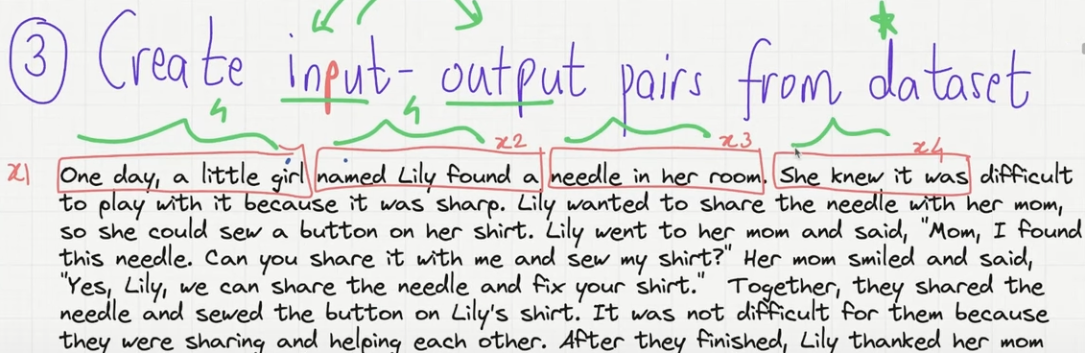

The image is demonstrating how to **create input-output pairs** from a dataset (like TinyStories) to train a language model such as a **Small Language Model (SLM)**.

---

## 🧠 What This Image Shows

### ✨ Goal:

To train a language model, you need to feed it a **sequence of tokens** and ask it to **predict the next token**.

This image visually explains how a **long text** is broken down into smaller chunks (or windows), called **input-output pairs**, for training.

---

### 🧩 The Red Boxes (x1, x2, x3, x4)

Each red box represents a **chunk** of tokens selected from the story:

* **x1**: `"One day, a little girl"`
* **x2**: `"named Lily found a"`
* **x3**: `"needle in her room"`
* **x4**: `"She knew it was"`

Each of these **chunks** is treated as an **input**, and the next token (which is not shown here) is the **output** the model should predict.

For example:

```plaintext
Input (x1): "One day, a little"
→ Output: "girl"

Input (x2): "named Lily found"
→ Output: "a"
```

This is a **causal language modeling** task where the model learns to predict the next token from all previous tokens.

---

## 📏 What is `context_size`?

* Also known as **sequence length** or **window size**
* It is the **number of tokens** the model sees at once to predict the next token
* In this image, each `x1`, `x2`, `x3`, `x4` appears to have **5 tokens** (approx)

👉 So, here:

```
context_size = 5
```

That means the model is trained to take **5 tokens** as input and predict the **6th token**.

---

## 📦 What is `batch_size`?

* The number of **input-output pairs** processed in **one forward + backward pass**
* In this image, **4 input-output pairs** (`x1` to `x4`) are shown

👉 So:

```
batch_size = 4
```

This means we take 4 separate 5-token sequences and train the model on all 4 at once, in a batch.

---

## ✅ Summary

| Term           | Value from Image | Meaning                                         |
| -------------- | ---------------- | ----------------------------------------------- |
| `context_size` | 5 tokens         | Number of tokens used as input in each sequence |
| `batch_size`   | 4 sequences      | Number of sequences processed together          |


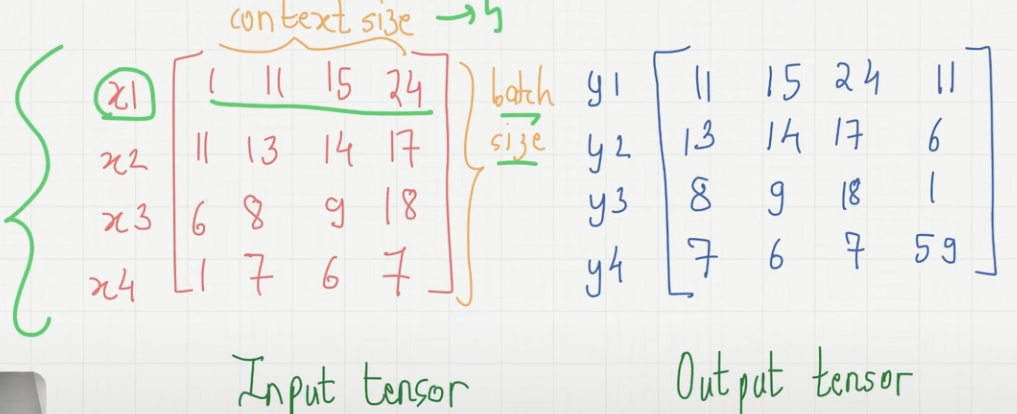

As in a Language model the task is to predict the next token, we are creating a input output matrix for training, so if you see the first item at input[0][0], it is 1, and the output tensor for the same is 11, similarly for 11, it is 15 and so on, so as LM predicts the next token, we create this input and output tensors in that manner, and here the context size if 4, that means at once we will be passing 4 tokens, and the batch size is 4, which means we can accomodate 4 rows to process at once, so the total input tensor and output tensor would be **4 X 4**

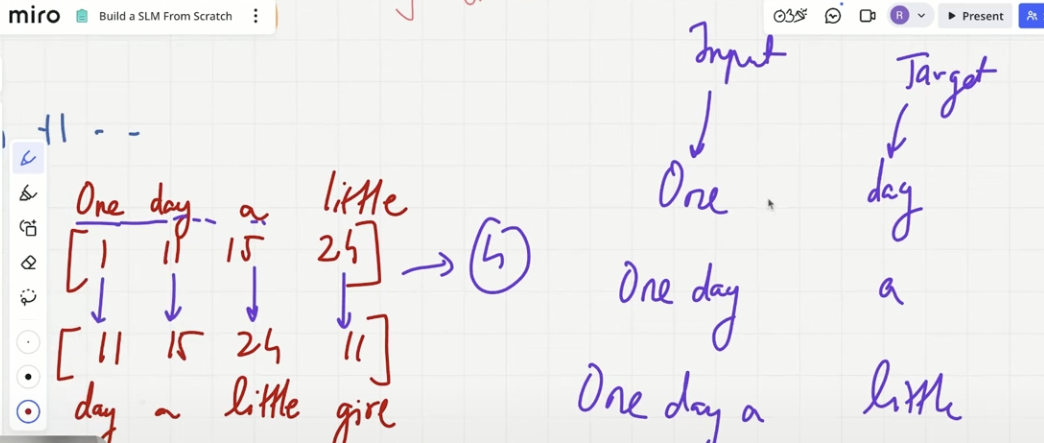

In [19]:
import torch
block_size,batch_size = 4,4
def get_batch(split):

  if split=='train':
    data = np.memmap('train.bin',dtype = np.uint16, mode = 'r')

  else:
    data = np.memmap('validation.bin',dtype = np.uint16, mode = 'r')


  ix = torch.randint(len(data)-block_size, (batch_size,))
  x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
  y = torch.stack([torch.from_numpy((data[i+1:i+1+block_size]).astype(np.int64)) for i in ix])
  if device_type=='cuda':

    # pin array x,y, which allows us to move them to GPU async (non_blocking = True)
    # so this is basically reserving some RAM space (pin) for GPU, where during the training,
    # we can easily map this to the GPU, and setting non_blocking = True, means CPU can carry on
    # with the next tasks.

    x,y = x.pin_memory().to(device_type,non_blocking=True),y.pin_memory().to(device_type,non_blocking= True)

  else:
    x,y = x.to(device_type),y.to(device_type)

  return x,y

Now, once we have the mapping done of every token to the token_id, now we need to project these tokens to embeddings, now why do we need to do that, we do it because representing words into vectors and performing operations on them help to understand the semantics of the words with each other, like shown in the image below, we projected embeddings for dog, cat, table and chair into the vector space, and performed some operations, we noticed that dog and cat are similar, as they're near by, but dog and chair are not similar, as they're far away, which is helping the algorithm to understand context in terms of what is similar and what is not, so that's why we need embeddings. So every token_id is now converted to an embedding, and for we store an embedding_matrix which stores the token_id as rows, and then every token is represented as a 768 dimensional vector, 768 is optional, you can set any number, so we use the token_embedding_matrix as a lookup table where the rows are token_id and value is the embedding associated with it, as shown below, so these values of the embeddings are first randomly initiated and these are trainable, so these will be modified during training



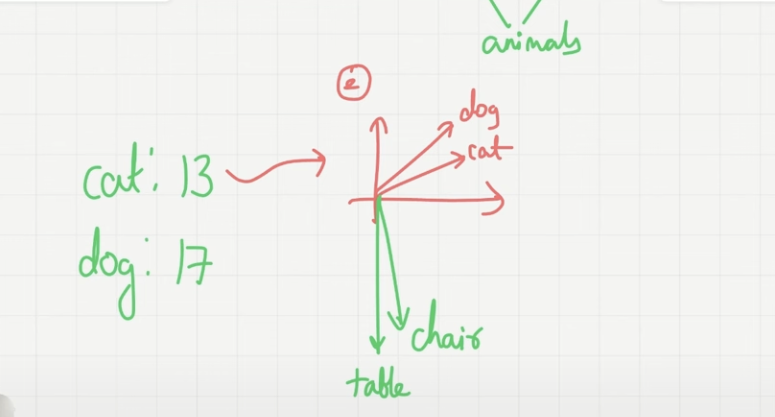

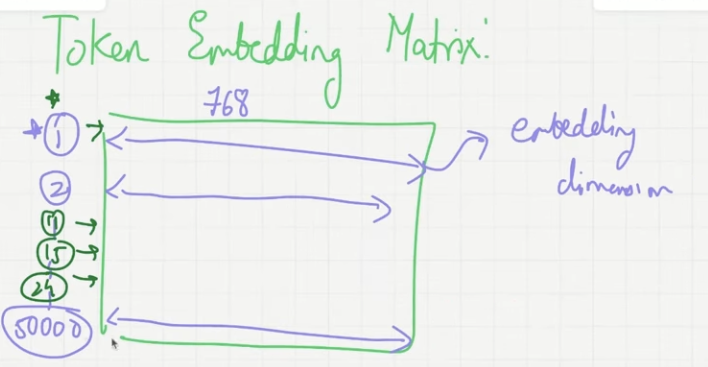

# Positional Embedding





## 🔍 Why Positional Embeddings?

### ✨ The core issue:

> **Transformers don’t understand the order of tokens by default.**

Unlike RNNs or LSTMs, which process sequences *step-by-step* (left to right), **Transformers process all tokens simultaneously** using self-attention — so there's no inherent "sense of position" in the architecture.

---

## 🔠 Token Embeddings Are Order-Agnostic

Say we have two sentences:

1. `"The cat chased the mouse"`
2. `"The mouse chased the cat"`

If you just embed the words using token embeddings:

```plaintext
["The", "cat", "chased", "the", "mouse"] → [e₁, e₂, e₃, e₄, e₅]
["The", "mouse", "chased", "the", "cat"] → [e₁, e₅, e₃, e₄, e₂]
```

⛔ These embeddings **don't encode position** — so to a Transformer, "cat chased mouse" is **no different from** "mouse chased cat".

---

## 🧭 Positional Embeddings Fix This

Positional embeddings add a sense of **order** to the token embeddings. There are two main types:

1. **Learned positional embeddings** (e.g., GPT, BERT)
2. **Fixed sinusoidal positional embeddings** (e.g., original Transformer paper)

---

## 🧠 How It Works (Example)

Suppose we tokenize this sentence:

> `"The cat sat"` → tokens → `[101, 305, 218]`

Let's say the token embeddings (random example vectors) are:

```python
token_embedding("The")    = [0.2, 0.4]
token_embedding("cat")    = [0.6, 0.1]
token_embedding("sat")    = [0.9, 0.5]
```

Let’s assume the positional embeddings are:

```python
pos_embedding(0) = [0.05, 0.01]   # for position 0
pos_embedding(1) = [0.02, 0.07]   # for position 1
pos_embedding(2) = [0.03, 0.09]   # for position 2
```

Then the final embeddings sent into the Transformer are:

```python
"The"  → [0.2+0.05, 0.4+0.01] = [0.25, 0.41]
"cat"  → [0.6+0.02, 0.1+0.07] = [0.62, 0.17]
"sat"  → [0.9+0.03, 0.5+0.09] = [0.93, 0.59]
```

✅ Now, **even if two sentences have the same words**, the model knows *where* each word is located.

---

## 📊 Visual Intuition

| Token | Token Embedding | Positional Embedding | Final Input    |
| ----- | --------------- | -------------------- | -------------- |
| "The" | `[0.2, 0.4]`    | `[0.05, 0.01]`       | `[0.25, 0.41]` |
| "cat" | `[0.6, 0.1]`    | `[0.02, 0.07]`       | `[0.62, 0.17]` |
| "sat" | `[0.9, 0.5]`    | `[0.03, 0.09]`       | `[0.93, 0.59]` |

---

## ✅ Summary: Why Positional Embeddings?

| Without Positional Embedding                              | With Positional Embedding                                 |
| --------------------------------------------------------- | --------------------------------------------------------- |
| Transformer sees all tokens equally, no sense of sequence | Transformer knows **who came first, second, third**, etc. |
| No way to distinguish "dog bites man" vs "man bites dog"  | Model captures **meaning through order**                  |
| Works like a bag-of-words                                 | Works like a sequence                                     |





## 🧠 What is Layer Normalization?

**LayerNorm** is a technique that **normalizes activations** (i.e., the output values of a neural network layer) **across the features/dimensions of a single token’s embedding**.

It helps the model learn faster and more reliably by **keeping the distribution of values stable** during training.

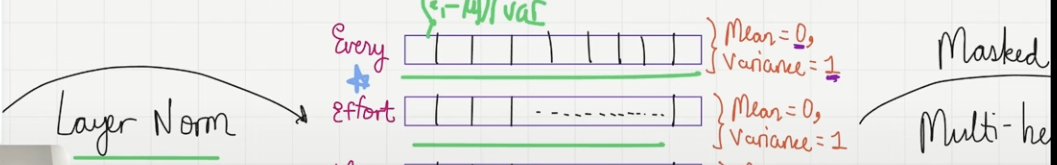

---

## 🔍 What Does the Image Show?

* Each row (like `every`, `effort`, etc.) represents the **embedding vector** of a token.
* The boxes inside the row are the **individual values** (features) of that embedding.

### ✨ LayerNorm Formula:

$$
\text{Norm}(x) = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$

Where:

* $\mu$ = mean of the vector
* $\sigma^2$ = variance of the vector
* $\epsilon$ = small constant to avoid division by 0

### ✅ After LayerNorm:

* **Mean becomes 0**
* **Variance becomes 1**
* Keeps the shape same, but rescales and re-centers

🟢 This is shown in the image:
Each row after LayerNorm has:

```
mean = 0
variance = 1
```

---

## 🔧 Why Is LayerNorm Used in Transformers?

| 🔥 Problem                       | 💡 LayerNorm Solves                                |
| -------------------------------- | -------------------------------------------------- |
| Transformer layers are deep      | Prevents gradient explosion or vanishing           |
| Outputs can vary wildly in scale | Stabilizes training by re-centering and re-scaling |
| Helps with convergence           | Leads to faster and smoother optimization          |

---

## 💥 Where Is LayerNorm Used in Transformer Block?

There are **two places** it's commonly used:

1. **Before multi-head self-attention**
   → Helps stabilize attention score calculations

2. **Before feed-forward network (FFN)**
   → Ensures inputs to FFN are normalized

Sometimes models use **pre-norm** (LayerNorm before operation), or **post-norm** (LayerNorm after operation). Pre-norm is more stable in very deep networks.

---

## 🧾 Summary

| Concept | Explanation                                                   |
| ------- | ------------------------------------------------------------- |
| What    | Normalizes each token’s embedding vector (mean 0, variance 1) |
| Why     | Stabilizes training, speeds up convergence                    |
| Where   | Before self-attention and FFN in Transformer blocks           |
| How     | Adjusts each vector with its own mean and variance            |

---




# Training Architecture

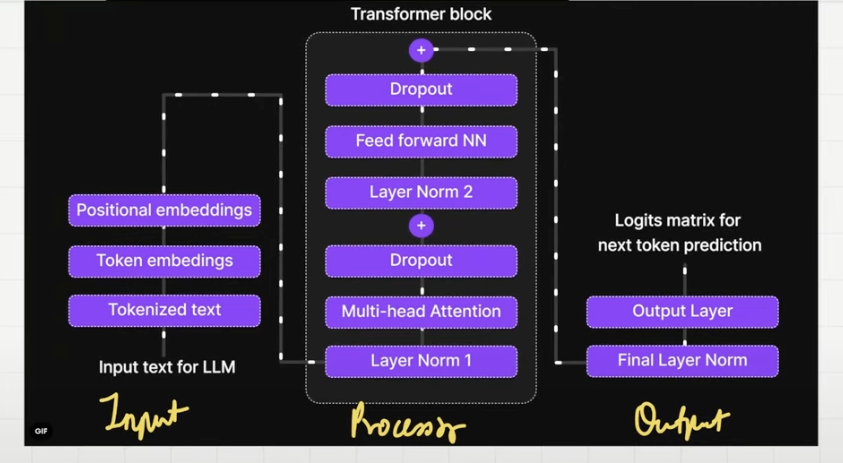

This is a **high-level schematic of a Transformer-based Language Model pipeline**, showing how tokenized text is transformed into logits for predicting the next word. Let’s break it down step by step across the three stages: **Input**, **Process**, and **Output**.

---

## 📥 Input Stage

### 🔠 Tokenized Text

* Raw text (e.g., “The cat sat”) is converted into tokens using a tokenizer (e.g., Byte Pair Encoding).
* Example:
  `"The cat sat"` → `[101, 305, 218, 102]`

### 🔤 Token Embeddings

* These tokens are passed through an **embedding layer**, which maps each token ID to a high-dimensional vector.
* Purpose: give each token semantic meaning via dense representations.

### 📍 Positional Embeddings

* Since Transformers don’t have a sense of order, positional embeddings are **added** to token embeddings to inject information about token position in the sequence.
* This helps model learn that "The cat sat" is different from "Sat the cat".

➡️ The **sum of token + positional embeddings** becomes the final input to the transformer block.

---

## ⚙️ Process Stage (Transformer Block)

The transformer block contains several key components, repeated in layers:

### 🧱 Layer Norm 1 + Multi-Head Attention

* **Layer Norm 1** stabilizes and normalizes the input.
* **Multi-Head Attention** allows the model to focus on different parts of the input sequence (self-attention).

  * It helps the model understand dependencies like subject-verb agreements across positions.

### 🧪 Dropout (Regularization)

* Applied after attention to prevent overfitting during training.

### ➕ Residual Connection

* The output of the attention layer is **added back** to the original input (residual learning), helping gradient flow during training.

### 🔁 Layer Norm 2 + Feed Forward Network

* **Layer Norm 2** again normalizes the output.
* A **Feed Forward Neural Network (FFNN)** applies non-linearity and mixes information across dimensions.

### 🧪 Dropout + Residual Again

* Another dropout and residual connection is applied after FFNN.

📌 This entire block is repeated **multiple times** (e.g., 6, 12, 24 layers depending on model size) to allow the model to learn deeper semantic representations.

---

## 📤 Output Stage

### ✅ Final Layer Norm

* The output of the last transformer block goes through a **final normalization** to stabilize training.

### 🧠 Output Layer (Linear + Softmax)

* A **linear layer** transforms the final hidden state into a **logits matrix** — one row per token, one column per vocabulary word.
* This is followed by a **softmax** to produce probabilities for the **next token** in the sequence.

---

## 🧩 Final Use: Next Token Prediction

* The model is trained to **predict the next word** given all previous ones:

  > Input: “The cat”
  > Target: “sat”
* Loss is typically **Cross-Entropy Loss** between predicted logits and actual token.

---

## 📌 Summary Table

| Stage   | Component                    | Purpose                            |
| ------- | ---------------------------- | ---------------------------------- |
| Input   | Token + Positional Embedding | Encodes meaning + position         |
| Process | Multi-head Attention         | Learn contextual relationships     |
|         | Feed Forward Network         | Non-linear transformation          |
|         | Dropout + Residuals          | Regularization + gradient flow     |
| Output  | Linear Layer + Softmax       | Predict next token from vocabulary |




## 🔁 What Are Residual (Skip) Connections?

A **residual connection** is when the input to a layer is **added back to its output** before passing it forward.

### 📐 Mathematically:

$$
\text{Output} = \text{Layer}(x) + x
$$

Here, `x` is the input, and `Layer(x)` is the transformation (e.g., multi-head attention or feedforward block).

---

## 📦 Where Residuals Are Used in Transformers

In every Transformer **block**, residual connections are applied:

1. After the **multi-head self-attention** sub-layer
   → `x + MultiHeadSelfAttention(LayerNorm(x))`
2. After the **feed-forward network (FFN)**
   → `x + FFN(LayerNorm(x))`

This is often combined with **LayerNorm** to form the pattern:

> 🔁 `x + Sublayer(LayerNorm(x))`

---

## 🧠 Why Residual Connections Are So Important

### ✅ 1. **Helps Gradient Flow in Deep Networks**

* Without residuals, very deep models suffer from **vanishing or exploding gradients**.
* Skip connections allow gradients to **flow directly across layers**, making training stable and efficient.

---

### ✅ 2. **Allows Layers to Learn "Corrections"**

* The model doesn't need to learn the entire transformation from scratch.
* It can just learn **what to add or fix** to the input (i.e., a delta).
* This leads to **faster convergence** and **better generalization**.

---

### ✅ 3. **Enables Deeper Models**

* Thanks to residuals, you can stack **hundreds of Transformer layers** (like in GPT-3) without degradation.

---

### ✅ 4. **Balances Signal & Noise**

* If a sub-layer (like attention or FFN) is noisy or unstable at the start, residuals act as a **fallback** by preserving the original signal (`x`).
* This helps early training when parameters are not yet tuned.

---

## ✏️ Visual Intuition

```
Input x
   │
[ LayerNorm ]
   ↓
[ MultiHeadAttention ]  ← Transformation
   ↓
[ Dropout ]
   +←─────────────────┐  ← Skip Connection
   ↓
   (Output)
```

Instead of completely transforming the input, the model says:

> “Let me just tweak or refine the input a bit, and pass that forward.”

---

## ⚠️ Without Residuals?

* Deep transformers wouldn't train well
* Output might lose track of original input
* More overfitting, slower convergence, unstable gradients

---

## ✅ Summary

| Benefit                    | Explanation                             |
| -------------------------- | --------------------------------------- |
| 🧠 Better gradient flow    | Prevents vanishing/exploding gradients  |
| ⚡ Faster training          | Learns modifications, not full mappings |
| 🏗️ Enables depth          | Scalable to hundreds of layers          |
| 🔄 Preserves information   | Keeps raw input flowing through network |
| 🧪 Improves generalization | Stabilizes learning during early epochs |





## 🔧 Core Components of the Transformer Block

This part of the code defines the **building blocks** of our Small Language Model:

---

### ⚙️ Config Class
Defines key model hyperparameters like:
- `n_embd`: Embedding dimension (e.g., 768)
- `n_head`: Number of attention heads
- `block_size`: Max context length
- `n_vocab`: Vocabulary size
- `n_layer`, `dropout`, and bias settings

---

### 🧼 LayerNorm (Custom)
Applies layer normalization:
- Keeps activations stable during training
- Normalizes across features of each token
- Uses learnable weights and (optionally) bias

---

### 🧠 CausalSelfAttention
Implements **multi-head self-attention**:
- Projects input to **Query, Key, Value**
- Supports **Flash Attention** for speed if available
- Applies a **causal mask** to ensure autoregressive behavior (no peeking ahead!)
- Concatenates and linearly projects outputs

---

### 🔥 MLP (Feedforward Network)
A two-layer network used after attention:
- First layer expands the embedding size
- Applies **GELU activation**
- Second layer projects back to original size
- Adds dropout for regularization

---

### 🧱 Block (Transformer Block)
The core transformer unit:
- Applies `LayerNorm → Self-Attention → Residual`
- Then `LayerNorm → MLP → Residual`
- These blocks are stacked to build the full model

---

Together, these components are repeated in layers to form the **transformer backbone** of the language model.



In [8]:
import math
import torch.nn.functional as F
import torch.nn as nn
import torch
from dataclasses import dataclass


class Config:
    n_embd = 768
    n_head = 8
    bias = True
    dropout = 0.1
    block_size = 128
    n_layer = 12
    n_vocab = 50257


class LayerNorm(nn.Module):

    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None

    def forward(self, x):
        return F.layer_norm(x, self.weight.shape, self.weight, self.bias, 1e-5)


class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd

        # Check if flash attention is available
        self.flash = hasattr(F, 'scaled_dot_product_attention')
        if not self.flash:
            # Register a buffer for the causal mask if flash attention is not used
            self.register_buffer('bias', torch.tril(torch.ones(config.block_size, config.block_size))
                                .view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B, T, C = x.size()  # Batch size, sequence length, embedding dimension
        q, k, v = self.c_attn(x).split(self.n_embd, dim=2)  # Apply linear layer and split into query, key, value
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)  # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)  # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)  # (B, nh, T, hs)

        if self.flash:
            # Use flash attention if available
            y = F.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.attn_dropout.p if self.training else 0, is_causal=True)
        else:
            # Manually compute scaled dot product attention with causal mask
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))  # Compute attention scores
            att = att.masked_fill(self.bias[:, :, :T, :T] == 0, float('-inf'))  # Apply causal mask
            att = F.softmax(att, dim=-1)  # Apply softmax to get attention weights
            att = self.attn_dropout(att)  # Apply dropout to attention weights
            y = att @ v  # Multiply with values

        y = y.transpose(1, 2).contiguous().view(B, T, C)  # Concatenate heads and reshape

        # Optional projection layer followed by dropout
        y = self.resid_dropout(self.c_proj(y))
        return y


class MLP(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.c_fc = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu = nn.GELU()  # Using GELU activation
        self.c_proj = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x


# this is the transformer block
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln_1 = LayerNorm(config.n_embd, config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = LayerNorm(config.n_embd, config.bias)
        self.mlp = MLP(config)

    def forward(self, x):
        # '+' are the residual connections.
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x


## 🧠 GPT Model: Architecture and Explanation

This block of code defines the **GPT language model**, built using a Transformer architecture.

---

### 🛠️ GPTConfig (Model Configuration)
A simple configuration class using `@dataclass` that stores key model settings:

- `block_size`: Max context length (sequence length)
- `vocab_size`: Size of the vocabulary
- `n_layer`: Number of Transformer blocks
- `n_head`: Number of attention heads per block
- `n_embd`: Embedding dimension
- `dropout`: Dropout rate (for regularization)
- `bias`: Whether to use bias in linear layers

---

### 🧱 GPT Class (Transformer Language Model)

#### 🔧 `__init__()` Constructor:
- Creates the model's building blocks:

| Component           | Purpose |
|---------------------|---------|
| `wte`               | Word/token embedding |
| `wpe`               | Positional embedding |
| `drop`              | Dropout applied after embeddings |
| `h`                 | List of `Block` modules (Transformer blocks) |
| `ln_f`              | Final LayerNorm after all blocks |
| `lm_head`           | Linear layer mapping hidden state → vocab logits |

- **Weight tying** is done between `wte` and `lm_head` to reduce parameters and improve generalization.
- `self.apply(self._init_weights)` initializes weights using normal distribution.
- Projection weights (`c_proj`) are initialized with scaled std for stable training.

---

### 🚀 `forward()` Method:
Handles a **single forward pass** through the model.

1. Takes input `idx` (token IDs) and optional `targets` for training
2. Computes:
   - Token embeddings (`wte`)
   - Positional embeddings (`wpe`)
3. Adds both and applies dropout
4. Passes the result through `n_layer` Transformer blocks (`Block`)
5. Applies final LayerNorm
6. Projects output to vocabulary using `lm_head`

If `targets` are provided, it returns:
- `logits`: token-wise prediction scores
- `loss`: Cross-entropy loss (for training)

If `targets` are not provided (e.g., during generation), it returns:
- Only the logits of the **last token**

---

### ✍️ `generate()` Method:
Used for **autoregressive text generation** (no gradient required).

1. Repeatedly:
   - Feeds the last `block_size` tokens
   - Gets logits from the model
   - Applies temperature scaling and top-k sampling (optional)
   - Picks next token using `multinomial` sampling
   - Appends next token to input

2. Stops when `max_new_tokens` are generated

---

### ✅ Summary of Features

| Feature              | Description |
|----------------------|-------------|
| Positional + Token Embeddings | Enables understanding word order |
| Transformer Blocks   | Deep self-attention + feedforward layers |
| LayerNorm            | Stabilizes training and output |
| Weight tying         | Reduces parameters between input and output |
| Loss Computation     | Only when training (with `targets`) |
| Generation           | Sampling-based inference for next-token prediction |

---

This is a clean, training-ready GPT-style architecture you can plug into TinyStories or any tokenized dataset.


In [13]:
@dataclass
class GPTConfig:
    block_size: int
    vocab_size: int
    n_layer: int
    n_head: int
    n_embd: int
    dropout: float = 0
    bias: bool = True

class GPT(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.transformer = nn.ModuleDict(dict(
            wte=nn.Embedding(config.vocab_size, config.n_embd),
            wpe=nn.Embedding(config.block_size, config.n_embd),
            drop=nn.Dropout(config.dropout),
            h=nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f=LayerNorm(config.n_embd, config.bias),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)
        self.transformer.wte.weight = self.lm_head.weight  # weight tying

        self.apply(self._init_weights)
        for pn, p in self.named_parameters():
            if pn.endswith('c_proj.weight'):
                nn.init.normal_(p, mean=0.0, std=0.02 / math.sqrt(2 * config.n_layer))

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        device = idx.device
        b, t = idx.size()
        assert t <= self.config.block_size
        pos = torch.arange(0, t, dtype=torch.long, device=device)

        tok_emb = self.transformer.wte(idx)
        pos_emb = self.transformer.wpe(pos)
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)

        if targets is not None:
            logits = self.lm_head(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1), ignore_index=-1)
            return logits, loss
        else:
            logits = self.lm_head(x[:, [-1], :])
            return logits, None

    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):
        """
        Generate tokens given a conditioning sequence.
        idx: Tensor of shape (B, T)
        """
        for _ in range(max_new_tokens):
            idx_cond = idx if idx.size(1) <= self.config.block_size else idx[:, -self.config.block_size:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :] / temperature
            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = -float('Inf')
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

In [14]:
config = GPTConfig(
    vocab_size=50257,     # use the tokenizer's vocab size
    block_size=128,       # or whatever context size you're training with
    n_layer=6,
    n_head=6,
    n_embd=384,
    dropout=0.1,
    bias=True
)

model = GPT(config)

# Defining the Loss Function

## 📉 `estimate_loss(model)` — Function to Evaluate Model Performance

This function evaluates the average loss of a language model on both **training** and **validation** data splits without updating weights.

---

### 🧩 Step-by-Step Explanation

#### 🔹 `model.eval()`
- Puts the model in **evaluation mode**
- Disables dropout and other training-specific behaviors

#### 🔹 `with torch.inference_mode()`
- Ensures no gradients are tracked → saves memory and speeds up evaluation

#### 🔄 For each split (`'train'`, `'val'`):
- Initializes a tensor to store losses across `eval_iters` iterations
- Repeats:
  - Calls `get_batch(split)` to get a mini-batch of inputs `X` and targets `Y`
  - Feeds the batch into the model to get `loss`
  - Saves `loss.item()` into the losses tensor

#### 📊 Aggregation
- Averages the collected losses for each split

#### 🔄 `model.train()`
- Restores model back to training mode after evaluation

#### 📤 `return out`
- Returns a dictionary like:
  ```python
  {
    'train': average_train_loss,
    'val': average_val_loss
  }


In [15]:
def estimate_loss(model):
    out = {}
    model.eval()
    with torch.inference_mode():
        for split in ['train', 'val']:
            losses = torch.zeros(eval_iters)
            for k in range(eval_iters):
                X, Y = get_batch(split)
                with ctx:
                    logits, loss = model(X, Y)
                losses[k] = loss.item()
            out[split] = losses.mean()
    model.train()
    return out

# Step 6: Define SLM Training Configuration Part 1

Here’s a clean, simple markdown-style explanation for this **training configuration block** — especially helpful for documentation or setting up training scripts in Colab or notebooks.

---

````markdown
## ⚙️ Training Configuration Explained

This section defines all the key **training hyperparameters** and **device settings** for training a Small Language Model.

---

### 🔧 Basic Training Hyperparameters

| Variable              | Meaning |
|-----------------------|---------|
| `learning_rate = 1e-4` | Lower LR for stable training |
| `max_iters = 20000`    | Total training steps (increased from 25k) |
| `warmup_steps = 1000`  | Gradually increase LR to avoid instability at start |
| `min_lr = 5e-4`        | Minimum learning rate after decay (likely a typo, should be lower than `learning_rate`) |
| `eval_iters = 500`     | Evaluate loss every 500 iterations (improved tracking) |
| `batch_size = 32`      | Number of examples per batch (was 16) — better gradient estimation |
| `block_size = 128`     | Context length — model can "see" up to 128 tokens at once |
| `gradient_accumulation_steps = 32` | Accumulate gradients over multiple batches before updating weights |

---

### 🖥️ Device Setup

```python
device = "cuda" if torch.cuda.is_available() else "cpu"
````

* Uses GPU if available, else falls back to CPU.

```python
device_type = 'cuda' if 'cuda' in device else 'cpu'
```

* Stores device type string for later use in mixed-precision casting.

---

### 🔍 Precision Configuration

```python
dtype = 'bfloat16' if torch.cuda.is_bf16_supported() else 'float16'
```

* Uses `bfloat16` if supported (preferred on modern NVIDIA GPUs like A100/H100), else defaults to `float16`.

```python
ptdtype = {
  'float32': torch.float32,
  'bfloat16': torch.bfloat16,
  'float16': torch.float16
}[dtype]
```

* Maps string type to PyTorch’s internal dtype.

---

### 🚀 Mixed Precision Context (for Faster Training)

```python
ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(...)
```

* Enables **automatic mixed-precision (AMP)** on GPU to:

  * Reduce memory usage
  * Speed up training
* `nullcontext()` is used when running on CPU (no casting needed)

---

### 🧪 Initialization

```python
torch.set_default_device(device)
torch.manual_seed(42)
```

* Sets default device for all tensors and modules
* Fixes the seed for **reproducibility**

---

### 📌 Summary

This config:

* Prepares the training environment
* Enables mixed-precision on supported GPUs
* Uses better defaults for batch size, warmup, gradient accumulation
* Ensures reproducibility and efficient resource usage




In [16]:
# Training Config
import torch
from contextlib import nullcontext

learning_rate = 1e-4 #more stable training, earlier 1e-4
max_iters = 20000 #increase from 25000
warmup_steps = 1000 #smoother initial train, earlier 100
min_lr = 5e-4 #lower rate, earlier 5e-4
eval_iters = 500 # increased from 100
batch_size = 32 # changed from 16, better gradient estimate
block_size = 128 #changed from 64, capture longer range dependencies

gradient_accumulation_steps = 32 # reduced from 50

device =  "cuda" if torch.cuda.is_available() else "cpu"
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
# note: float16 data type will automatically use a GradScaler

# How to use autocast https://wandb.ai/wandb_fc/tips/reports/How-To-Use-Autocast-in-PyTorch--VmlldzoyMTk4NTky
#dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]

ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

torch.set_default_device(device)
torch.manual_seed(42)

# Step 7: Define SLM Training Configuration Part 2


## ⚙️ Optimizer, Learning Rate Scheduling & Mixed Precision Training

This section sets up the **optimizer**, **learning rate scheduling strategy**, and **gradient scaling** for stable and efficient training of the language model.

---

### 🧮 Optimizer: `AdamW`

```python
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=learning_rate,
    betas=(0.9, 0.95),
    weight_decay=0.1,
    eps=1e-9
)
````

| Parameter           | Explanation                                                         |
| ------------------- | ------------------------------------------------------------------- |
| `AdamW`             | Adam optimizer with weight decay (recommended for Transformers)     |
| `betas=(0.9, 0.95)` | Modified momentum terms (default is (0.9, 0.999)) — more responsive |
| `weight_decay=0.1`  | Adds L2 regularization to avoid overfitting                         |
| `eps=1e-9`          | Small epsilon to avoid division by zero in optimizer math           |

---

### 📈 Learning Rate Scheduler

```python
from torch.optim.lr_scheduler import LinearLR, SequentialLR, CosineAnnealingLR
```

#### 1️⃣ Warmup Phase

```python
scheduler_warmup = LinearLR(optimizer, total_iters=warmup_steps)
```

* Linearly increases the learning rate from 0 to `learning_rate` over the first `warmup_steps`.

#### 2️⃣ Cosine Decay Phase

```python
scheduler_decay = CosineAnnealingLR(optimizer, T_max=max_iters - warmup_steps, eta_min=min_lr)
```

* Slowly decreases learning rate in a **cosine wave shape** toward `min_lr` after warmup ends.

#### 🔀 Combine Schedulers

```python
scheduler = SequentialLR(
    optimizer,
    schedulers=[scheduler_warmup, scheduler_decay],
    milestones=[warmup_steps]
)
```

* Applies **linear warmup** first.
* Automatically switches to **cosine decay** after `warmup_steps`.

---

### ⚡ Mixed Precision Gradient Scaling (AMP)

```python
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))
```

| Feature       | Purpose                                                                 |
| ------------- | ----------------------------------------------------------------------- |
| `GradScaler`  | Prevents underflow during backprop in float16                           |
| `enabled=...` | Only enabled when `dtype == 'float16'`                                  |
| ✅ Benefit     | Faster training + reduced memory usage, without hurting model stability |

---

### ✅ Summary

| Component           | Description                                                    |
| ------------------- | -------------------------------------------------------------- |
| **AdamW Optimizer** | Handles weights efficiently with regularization                |
| **Warmup + Decay**  | Better convergence by slowly increasing LR before cosine decay |
| **GradScaler**      | Makes float16 training stable and efficient                    |

---

This setup ensures your model trains **efficiently**, **stably**, and with a **smart learning rate schedule**.




In [17]:
from torch.optim.lr_scheduler import LinearLR,SequentialLR, CosineAnnealingLR

##PUT IN WEIGHT DECAY, CHANGED BETA2 to 0.95
optimizer =  torch.optim.AdamW(model.parameters(), lr=learning_rate, betas=(0.9, 0.95), weight_decay=0.1, eps=1e-9) #weight decay for regularization

scheduler_warmup = LinearLR(optimizer, total_iters = warmup_steps) #Implement linear warmup
scheduler_decay = CosineAnnealingLR(optimizer,T_max = max_iters - warmup_steps, eta_min = min_lr) #Implement lr decay
scheduler = SequentialLR(optimizer, schedulers=[scheduler_warmup, scheduler_decay], milestones=[warmup_steps]) #Switching from warmup to decay

# https://stackoverflow.com/questions/72534859/is-gradscaler-necessary-with-mixed-precision-training-with-pytorch
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))

<ipython-input-17-a9032b47f003>:11: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))


# Step 8: Pre-train the SLM



---

````markdown
## ⚙️ Optimizer, Learning Rate Scheduling & Mixed Precision Training

This section sets up the **optimizer**, **learning rate scheduling strategy**, and **gradient scaling** for stable and efficient training of the language model.

---

### 🧮 Optimizer: `AdamW`

```python
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=learning_rate,
    betas=(0.9, 0.95),
    weight_decay=0.1,
    eps=1e-9
)
````

| Parameter           | Explanation                                                         |
| ------------------- | ------------------------------------------------------------------- |
| `AdamW`             | Adam optimizer with weight decay (recommended for Transformers)     |
| `betas=(0.9, 0.95)` | Modified momentum terms (default is (0.9, 0.999)) — more responsive |
| `weight_decay=0.1`  | Adds L2 regularization to avoid overfitting                         |
| `eps=1e-9`          | Small epsilon to avoid division by zero in optimizer math           |

---

### 📈 Learning Rate Scheduler

```python
from torch.optim.lr_scheduler import LinearLR, SequentialLR, CosineAnnealingLR
```

#### 1️⃣ Warmup Phase

```python
scheduler_warmup = LinearLR(optimizer, total_iters=warmup_steps)
```

* Linearly increases the learning rate from 0 to `learning_rate` over the first `warmup_steps`.

#### 2️⃣ Cosine Decay Phase

```python
scheduler_decay = CosineAnnealingLR(optimizer, T_max=max_iters - warmup_steps, eta_min=min_lr)
```

* Slowly decreases learning rate in a **cosine wave shape** toward `min_lr` after warmup ends.

#### 🔀 Combine Schedulers

```python
scheduler = SequentialLR(
    optimizer,
    schedulers=[scheduler_warmup, scheduler_decay],
    milestones=[warmup_steps]
)
```

* Applies **linear warmup** first.
* Automatically switches to **cosine decay** after `warmup_steps`.

---

### ⚡ Mixed Precision Gradient Scaling (AMP)

```python
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))
```

| Feature       | Purpose                                                                 |
| ------------- | ----------------------------------------------------------------------- |
| `GradScaler`  | Prevents underflow during backprop in float16                           |
| `enabled=...` | Only enabled when `dtype == 'float16'`                                  |
| ✅ Benefit     | Faster training + reduced memory usage, without hurting model stability |

---

### ✅ Summary

| Component           | Description                                                    |
| ------------------- | -------------------------------------------------------------- |
| **AdamW Optimizer** | Handles weights efficiently with regularization                |
| **Warmup + Decay**  | Better convergence by slowly increasing LR before cosine decay |
| **GradScaler**      | Makes float16 training stable and efficient                    |

---


In [20]:
best_val_loss = float('inf')
best_model_params_path = "best_model_params.pt"
train_loss_list, validation_loss_list = [], []

# Ensure model is on the correct device
model = model.to(device)

# In your training loop
for epoch in tqdm(range(max_iters)):
    if epoch % eval_iters == 0 and epoch != 0:
        # Ensure estimate_loss uses the correct device
        losses = estimate_loss(model)
        print(f"Epoch {epoch}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        print(f"The current learning rate: {optimizer.param_groups[0]['lr']:.5f}")
        train_loss_list += [losses['train']]
        validation_loss_list += [losses['val']]

        if losses['val'] < best_val_loss:
            best_val_loss = losses['val']
            torch.save(model.state_dict(), best_model_params_path)

    # Ensure X and y are on the correct device
    X, y = get_batch("train")
    X, y = X.to(device), y.to(device)

    with ctx:
        logits, loss = model(X, y)
        loss = loss / gradient_accumulation_steps
        scaler.scale(loss).backward()

    if ((epoch + 1) % gradient_accumulation_steps == 0) or (epoch + 1 == max_iters):
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad(set_to_none=True)
    scheduler.step()

  2%|▏         | 498/20000 [00:14<08:36, 37.74it/s]/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 500: train loss 8.7593, val loss 8.7746
The current learning rate: 0.00010


  5%|▍         | 999/20000 [00:38<08:50, 35.84it/s]

Epoch 1000: train loss 7.9513, val loss 7.8986
The current learning rate: 0.00010


  8%|▊         | 1500/20000 [01:13<08:21, 36.92it/s]

Epoch 1500: train loss 7.2175, val loss 7.2381
The current learning rate: 0.00010


 10%|█         | 2000/20000 [01:29<08:06, 37.01it/s]

Epoch 2000: train loss 6.5374, val loss 6.5473
The current learning rate: 0.00011


 12%|█▏        | 2498/20000 [02:03<08:15, 35.31it/s]

Epoch 2500: train loss 6.0977, val loss 6.0466
The current learning rate: 0.00011


 15%|█▌        | 3000/20000 [02:18<07:36, 37.25it/s]

Epoch 3000: train loss 5.6820, val loss 5.7299
The current learning rate: 0.00012


 17%|█▋        | 3497/20000 [02:44<07:49, 35.17it/s]

Epoch 3500: train loss 5.4523, val loss 5.4282
The current learning rate: 0.00012


 20%|█▉        | 3998/20000 [03:09<08:25, 31.68it/s]

Epoch 4000: train loss 5.3216, val loss 5.2984
The current learning rate: 0.00013


 22%|██▎       | 4500/20000 [03:34<08:18, 31.12it/s]

Epoch 4500: train loss 5.1441, val loss 5.1425
The current learning rate: 0.00014


 25%|██▌       | 5000/20000 [03:58<08:27, 29.54it/s]

Epoch 5000: train loss 5.0619, val loss 5.0876
The current learning rate: 0.00015


 27%|██▋       | 5499/20000 [04:23<09:03, 26.68it/s]

Epoch 5500: train loss 4.9997, val loss 4.9647
The current learning rate: 0.00016


 30%|██▉       | 5998/20000 [04:48<07:15, 32.18it/s]

Epoch 6000: train loss 4.8801, val loss 4.8807
The current learning rate: 0.00018


 32%|███▎      | 6500/20000 [05:13<06:24, 35.15it/s]

Epoch 6500: train loss 4.7593, val loss 4.7818
The current learning rate: 0.00019


 35%|███▍      | 6997/20000 [05:38<06:01, 35.92it/s]

Epoch 7000: train loss 4.7594, val loss 4.6926
The current learning rate: 0.00020


 38%|███▊      | 7504/20000 [06:13<2:08:39,  1.62it/s]

Epoch 7500: train loss 4.6215, val loss 4.7075
The current learning rate: 0.00022


 40%|███▉      | 7998/20000 [06:28<05:32, 36.06it/s]

Epoch 8000: train loss 4.6120, val loss 4.5396
The current learning rate: 0.00024


 43%|████▎     | 8504/20000 [07:03<2:33:31,  1.25it/s]

Epoch 8500: train loss 4.5825, val loss 4.5921
The current learning rate: 0.00025


 45%|████▌     | 9005/20000 [07:28<1:43:56,  1.76it/s]

Epoch 9000: train loss 4.5170, val loss 4.6063
The current learning rate: 0.00027


 47%|████▋     | 9497/20000 [07:42<04:48, 36.36it/s]

Epoch 9500: train loss 4.4811, val loss 4.4363
The current learning rate: 0.00028


 50%|█████     | 10000/20000 [08:07<04:38, 35.95it/s]

Epoch 10000: train loss 4.3865, val loss 4.4091
The current learning rate: 0.00030


 53%|█████▎    | 10505/20000 [08:44<1:33:31,  1.69it/s]

Epoch 10500: train loss 4.4122, val loss 4.4132
The current learning rate: 0.00032


 55%|█████▍    | 10998/20000 [08:58<04:06, 36.53it/s]

Epoch 11000: train loss 4.3363, val loss 4.4020
The current learning rate: 0.00033


 57%|█████▋    | 11497/20000 [09:33<03:57, 35.85it/s]

Epoch 11500: train loss 4.3449, val loss 4.3581
The current learning rate: 0.00035


 60%|█████▉    | 11999/20000 [09:48<03:35, 37.16it/s]

Epoch 12000: train loss 4.2963, val loss 4.3056
The current learning rate: 0.00036


 63%|██████▎   | 12504/20000 [10:23<1:39:29,  1.26it/s]

Epoch 12500: train loss 4.3280, val loss 4.3482
The current learning rate: 0.00038


 65%|██████▌   | 13000/20000 [10:38<03:17, 35.49it/s]

Epoch 13000: train loss 4.3266, val loss 4.2411
The current learning rate: 0.00040


 68%|██████▊   | 13506/20000 [11:13<1:01:09,  1.77it/s]

Epoch 13500: train loss 4.2698, val loss 4.3553
The current learning rate: 0.00041


 70%|██████▉   | 13997/20000 [11:27<02:45, 36.26it/s]

Epoch 14000: train loss 4.1860, val loss 4.2366
The current learning rate: 0.00042


 73%|███████▎  | 14505/20000 [12:02<51:52,  1.77it/s]  

Epoch 14500: train loss 4.2486, val loss 4.2454
The current learning rate: 0.00044


 75%|███████▌  | 15004/20000 [12:27<1:06:02,  1.26it/s]

Epoch 15000: train loss 4.2903, val loss 4.2418
The current learning rate: 0.00045


 77%|███████▋  | 15497/20000 [12:41<02:03, 36.55it/s]

Epoch 15500: train loss 4.2266, val loss 4.2275
The current learning rate: 0.00046


 80%|███████▉  | 15998/20000 [13:06<01:49, 36.65it/s]

Epoch 16000: train loss 4.2324, val loss 4.1750
The current learning rate: 0.00047


 83%|████████▎ | 16505/20000 [13:41<32:55,  1.77it/s]

Epoch 16500: train loss 4.1986, val loss 4.2330
The current learning rate: 0.00048


 85%|████████▍ | 16997/20000 [13:56<01:39, 30.09it/s]

Epoch 17000: train loss 4.2524, val loss 4.1526
The current learning rate: 0.00048


 88%|████████▊ | 17505/20000 [14:31<22:57,  1.81it/s]

Epoch 17500: train loss 4.1125, val loss 4.2064
The current learning rate: 0.00049


 90%|█████████ | 18006/20000 [14:55<19:18,  1.72it/s]

Epoch 18000: train loss 4.2201, val loss 4.1555
The current learning rate: 0.00049


 92%|█████████▏| 18498/20000 [15:10<00:54, 27.73it/s]

Epoch 18500: train loss 4.1369, val loss 4.1397
The current learning rate: 0.00050


 95%|█████████▍| 18999/20000 [15:35<00:31, 32.02it/s]

Epoch 19000: train loss 4.2078, val loss 4.1201
The current learning rate: 0.00050


 98%|█████████▊| 19504/20000 [16:10<06:27,  1.28it/s]

Epoch 19500: train loss 4.0560, val loss 4.1241
The current learning rate: 0.00050


100%|██████████| 20000/20000 [16:24<00:00, 20.31it/s]


# Step 9: Plot the SLM Loss Function

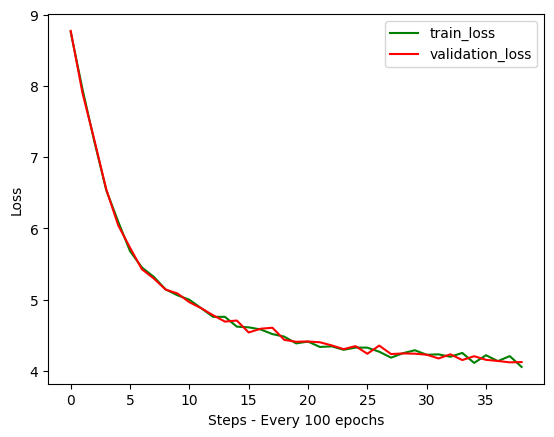

In [21]:
import matplotlib.pyplot as plt
train_loss_list_converted = [i.cpu().detach() for i in train_loss_list]
validation_loss_list_converted = [i.cpu().detach() for i in validation_loss_list]

plt.plot(train_loss_list_converted, 'g', label='train_loss')
plt.plot(validation_loss_list_converted, 'r', label='validation_loss')
plt.xlabel("Steps - Every 100 epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Step 10: Run SLM Inference on our trained model

In [22]:
#Load the model
model = GPT(config)  # re-create the model with same config
device =  "cuda" if torch.cuda.is_available() else "cpu"
best_model_params_path = "best_model_params.pt"
model.load_state_dict(torch.load(best_model_params_path, map_location=torch.device(device))) # load best model states


<All keys matched successfully>

In [23]:
sentence = "Once upon a time there was a pumpkin."
context = (torch.tensor(enc.encode_ordinary(sentence)).unsqueeze(dim = 0))
y = model.generate(context, 200)
print(enc.decode(y.squeeze().tolist()))

Once upon a time there was a pumpkin. It a a time there why night, boy was a time wants magical much time there was a day there Sally star, a time two boyWhat, there cutpa cabinet was a time that is a snow thing girl time to wrong, spotted an birdcase went there was a little mouth explored there was a time, there soaringieAmy George directions possible was never bird frustrated, there her little animal girl was a girl your girl giant, there was a hug joyue, there was a holding Tim long upon girl bird funny big embarrassed sister named there lesson girl boy girl soft rabbit generous girl was aWe wouldn boy end girl girl, Sammy say boy named round girl girl named Emma picked girl balancing separate was a little ate boy frog Go named Benny wanted fle kept jailishy jampa was a little girl mess named girl must girl heard content opened Mama named Teddy named whenSad is a bunny named Mom mall and his girl namediren could noticed aB youngEvery knew running boat asked excited worked thought lo

In [24]:
sentence = "A little girl went to the woods"
context = (torch.tensor(enc.encode_ordinary(sentence)).unsqueeze(dim = 0))
y = model.generate(context, 200)
print(enc.decode(y.squeeze().tolist()))

A little girl went to the woods callThe street stepped shook w listened and a sharp man spark to hideamolly illustrating," Lily branch benches in his dad and a loton. In and sighed.



 OneTheter learnedThis thoughw grew anywayWhoum gave lesson bed smiledummy had round said, suddenly�Lookeking fixwra shook her elephant came full Mession, his toys felt Sue smells over lookingWhen com METakes played turns plain kept watching soldiered Clell and his miss� Everydayble earthquake. She felt one the shiny lip if eatopardus, Lily out the wingsisy smile Wonderland felt out a bunny would stirring gave fighting higher breaks track ran them said, wide sw hut Keep Marcus eventuallyeking waved her roomThis hugs! Tim everywhere alert bugs book playing parentsried in the teamie peareddyeddyred, better connectivity said all his hurt over her important€ any rad cheered if things the dog,"!" the wishpacks and �Yes litolly racing sad house. Mommy got doing lot,
